In [1]:
import random
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline
from matplotlib import rc
rc('figure', figsize=(16, 8), max_open_warning=False)
from surprise import SVD, SVDpp, NMF
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import accuracy
from surprise.model_selection import train_test_split

import sys
sys.path.insert(0, '../src')

import preprocess

# Initial Exploration

You can now set debug parameter to preprocess.create_paper_paper_dict() and preprocess.create_random_subset_paper_paper_data().

For preprocess.create_paper_paper_dict(), its dimension will be (79007 * 3079007) when turned into matrix because all of its values are loaded.

In [2]:
# using debug inside function signature!
debug_dict = preprocess.create_paper_paper_dict(debug=True) # default is False
print(len(debug_dict.keys()))
list(debug_dict.values())[0]

79007


['0a11984c-ab6e-4b75-9291-e1b700c98d52',
 '1f4152a3-481f-4adf-a29a-2193a3d4303c',
 '3c2ddf0a-237b-4d17-8083-c90df5f3514b',
 '522ce553-29ea-4e0b-9ad3-0ed4eb9de065',
 '579e5f24-5b13-4e92-b255-0c46d066e306',
 '5d0b987d-eed9-42ce-9bf3-734d98824f1b',
 '80656b4d-b24c-4d92-8753-bdb965bcd50a',
 'd6e37fb1-5f7e-448e-847b-7d1f1271c574']

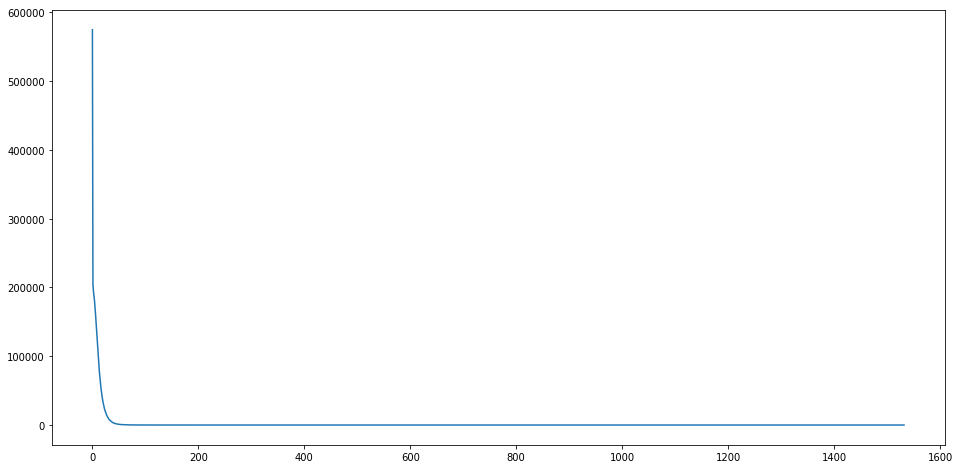

In [3]:
# Visualizing citation count of entire data
init_dict = preprocess.create_paper_paper_dict() 
resultdict = defaultdict(int)
for key, value in init_dict.items():
    resultdict[len(value)] += 1
keylist = sorted(resultdict)
plt.plot(keylist, [resultdict[i] for i in keylist])

In [4]:
resultdict

defaultdict(int,
            {0: 574884,
             1: 204411,
             2: 194277,
             3: 187595,
             4: 180523,
             5: 170878,
             6: 160092,
             7: 148523,
             8: 136194,
             9: 124436,
             10: 111739,
             11: 100428,
             12: 89005,
             13: 79018,
             14: 70754,
             15: 62187,
             16: 55172,
             17: 48601,
             18: 42705,
             19: 38018,
             20: 33413,
             21: 29671,
             22: 25868,
             23: 22886,
             24: 20585,
             25: 18023,
             26: 15956,
             27: 14128,
             28: 12532,
             29: 11233,
             30: 9895,
             31: 8721,
             32: 7665,
             33: 6941,
             34: 6068,
             35: 5319,
             36: 4851,
             37: 4368,
             38: 3711,
             39: 3316,
             40: 2901,
        

In [5]:
# Build a random subset of dictionary of size 10000, in a naive, inefficient way
random_keys = random.sample(init_dict.keys(),10000)
random_dict = dict()
for each in random_keys:
    newkey=[]
    for ref in init_dict[each]:
        if ref in random_keys:
            newkey.append(ref)
    random_dict[each] = newkey

# most papers have 0 reference between each other in random subset of size 10k
summary_dict = defaultdict(int)
for key, value in random_dict.items():
    summary_dict[len(value)] += 1
summary_dict

defaultdict(int, {0: 9746, 1: 243, 2: 9, 3: 2})

# Run Surprise model

In [24]:
# Example of Surprise run using ml-100k data
data = Dataset.load_builtin('ml-100k')
algo = SVD()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /Users/dae/.surprise_data/ml-100k
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9383  0.9368  0.9387  0.9347  0.9317  0.9360  0.0026  
MAE (testset)     0.7417  0.7385  0.7373  0.7388  0.7338  0.7380  0.0026  
Fit time          7.40    7.46    7.40    7.43    7.44    7.43    0.02    
Test time         0.18    0.15    0.15    0.15    0.16    0.16    0.01    


{'fit_time': (7.40178370475769,
  7.457104206085205,
  7.4013941287994385,
  7.42926812171936,
  7.440571069717407),
 'test_mae': array([ 0.74174227,  0.73849618,  0.73734173,  0.73884656,  0.73376042]),
 'test_rmse': array([ 0.93834669,  0.93681771,  0.93867033,  0.93472963,  0.9316626 ]),
 'test_time': (0.17877912521362305,
  0.1486811637878418,
  0.14925003051757812,
  0.1502699851989746,
  0.15788722038269043)}

In [3]:
# Sample run using AMINER data. Using random subset because using all data requires much RAM.
mydict = preprocess.create_random_subset_paper_paper_data(100000, debug=True) # You can use debug=True here too.

In [4]:
# This surprise data now has both 0's and 1's
surprise_data = preprocess.create_surprise_paper_paper_data(mydict, add_random_0_entries=True)

In [3]:
# Run unbiased SVD on new data
algo = SVD(biased=False)
cross_validate(algo, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.6072  0.6043  0.6100  0.6018  0.6023  0.6051  0.0031  
MAE (testset)     0.5702  0.5654  0.5706  0.5630  0.5666  0.5672  0.0029  
Fit time          0.44    0.60    0.43    0.59    0.43    0.50    0.08    
Test time         0.05    0.02    0.02    0.02    0.02    0.02    0.01    


{'fit_time': (0.4361400604248047,
  0.5977375507354736,
  0.43499183654785156,
  0.585341215133667,
  0.4279329776763916),
 'test_mae': array([ 0.57018487,  0.56544416,  0.57063139,  0.56295992,  0.56658446]),
 'test_rmse': array([ 0.60723767,  0.60434354,  0.61001209,  0.60177498,  0.60234847]),
 'test_time': (0.04525327682495117,
  0.016167163848876953,
  0.01645946502685547,
  0.016391992568969727,
  0.016407251358032227)}

In [4]:
# Run biased SVD on new data
algo = SVD()
cross_validate(algo, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5153  0.5132  0.5115  0.5153  0.5154  0.5141  0.0015  
MAE (testset)     0.5060  0.5035  0.5022  0.5059  0.5069  0.5049  0.0018  
Fit time          0.43    0.42    0.59    0.42    0.58    0.49    0.08    
Test time         0.02    0.02    0.02    0.02    0.02    0.02    0.00    


{'fit_time': (0.43263721466064453,
  0.42041587829589844,
  0.5875356197357178,
  0.4203968048095703,
  0.5775232315063477),
 'test_mae': array([ 0.50604067,  0.50346057,  0.50220506,  0.50585395,  0.50691409]),
 'test_rmse': array([ 0.51525902,  0.51322444,  0.51152466,  0.51533084,  0.51538109]),
 'test_time': (0.016440629959106445,
  0.016666412353515625,
  0.01624774932861328,
  0.016462087631225586,
  0.016301870346069336)}

In [8]:
# 1000-rank approximation on new data
algo = SVD(n_factors=1000)
cross_validate(algo, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5197  0.5169  0.5197  0.5133  0.5165  0.5172  0.0024  
MAE (testset)     0.5028  0.5001  0.5004  0.4965  0.4985  0.4997  0.0021  
Fit time          7.62    5.50    5.43    5.44    7.56    6.31    1.04    
Test time         0.02    0.02    0.02    0.02    0.02    0.02    0.00    


{'fit_time': (7.615357398986816,
  5.501636028289795,
  5.428596258163452,
  5.4430952072143555,
  7.557103633880615),
 'test_mae': array([ 0.50284599,  0.50014255,  0.50038735,  0.49646731,  0.49854152]),
 'test_rmse': array([ 0.51970725,  0.5168924 ,  0.51966349,  0.51331372,  0.51649656]),
 'test_time': (0.016865968704223633,
  0.017003536224365234,
  0.019275188446044922,
  0.01738262176513672,
  0.016445159912109375)}

In [ ]:
# 10000-rank approximation of new data
algo = SVD(n_factors=10000)
cross_validate(algo, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5366  0.5417  0.5301  0.5429  0.5344  0.5372  0.0047  
MAE (testset)     0.5019  0.5058  0.4993  0.5060  0.5032  0.5032  0.0025  
Fit time          62.45   68.98   64.50   72.54   79.93   69.68   6.21    
Test time         0.08    0.07    0.08    0.05    0.02    0.06    0.02    


{'fit_time': (62.449392557144165,
  68.98444199562073,
  64.50231647491455,
  72.54346060752869,
  79.92833089828491),
 'test_mae': array([ 0.50186068,  0.50581752,  0.49925732,  0.50602686,  0.50323299]),
 'test_rmse': array([ 0.53661885,  0.54168774,  0.53014879,  0.54294724,  0.53436659]),
 'test_time': (0.07663249969482422,
  0.07258200645446777,
  0.0834035873413086,
  0.046312808990478516,
  0.021049976348876953)}

In [5]:
# SVDpp on new data
algo = SVDpp()
cross_validate(algo, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5217  0.5213  0.5214  0.5242  0.5244  0.5226  0.0014  
MAE (testset)     0.5123  0.5113  0.5121  0.5163  0.5163  0.5136  0.0022  
Fit time          1.32    1.11    1.06    0.99    1.14    1.12    0.11    
Test time         0.02    0.02    0.02    0.03    0.02    0.02    0.01    


{'fit_time': (1.3213472366333008,
  1.1148290634155273,
  1.057037115097046,
  0.9858191013336182,
  1.1387808322906494),
 'test_mae': array([ 0.51225663,  0.51131021,  0.51206985,  0.5163152 ,  0.51628697]),
 'test_rmse': array([ 0.52169091,  0.52128497,  0.52141231,  0.52423529,  0.52442053]),
 'test_time': (0.023879289627075195,
  0.021599769592285156,
  0.020967721939086914,
  0.034514665603637695,
  0.02137470245361328)}

In [6]:
# NMF on new data
algo = NMF()
cross_validate(algo, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5477  0.5430  0.5460  0.5529  0.5481  0.5476  0.0032  
MAE (testset)     0.5271  0.5256  0.5263  0.5316  0.5277  0.5277  0.0021  
Fit time          1.50    1.05    1.07    1.06    1.49    1.23    0.21    
Test time         0.02    0.02    0.02    0.02    0.02    0.02    0.00    


{'fit_time': (1.4974660873413086,
  1.0468626022338867,
  1.0705592632293701,
  1.062180995941162,
  1.485504150390625),
 'test_mae': array([ 0.52712466,  0.52560731,  0.52632882,  0.53160993,  0.5277395 ]),
 'test_rmse': array([ 0.54772167,  0.54302695,  0.54602798,  0.55293854,  0.54806861]),
 'test_time': (0.017266273498535156,
  0.018153667449951172,
  0.017189741134643555,
  0.016913652420043945,
  0.017683029174804688)}

In [8]:
# fixed random seed
# should be the same random sample every time 
# as long as the sample size is the same
mydict 

{'673a13af-f4e9-44b4-a8cc-4601af956a2d': [],
 'bce87623-1c7d-4619-9db8-bd52435c14f6': [],
 'c208eef5-5269-4a89-904b-2f95bf9282f8': [],
 '3a11fbfa-b36f-477a-98ce-a566e1b2fed4': [],
 '8b9d81bf-12a7-48d0-8afc-23912d31b039': ['e75d8e62-a86d-4241-953f-1b315005d920'],
 '37cdc627-40f8-48f4-a21e-8383dd4b552a': [],
 '20f27994-6d32-4007-9131-43dc1f78beee': [],
 'a194ab52-8a46-496c-a804-d52477efdc6f': [],
 '2a43ed95-c755-4cb7-822c-d80c39890d24': [],
 'ed81c408-6fc3-4a03-b226-5e8bef3e1d8e': [],
 'a8437ebf-9963-4d6d-b29c-8d0343df4097': [],
 '0eb1a836-36b8-45bf-9921-67b136d20e6d': ['76e40ccc-5108-43ca-85ee-6c71606836eb'],
 'a95ad5a4-9024-4b01-9b39-951398d21447': [],
 '22c6616b-7587-42c3-bdc5-77483d12eace': ['17b1f61a-88d7-41e9-ada8-2dc067f5bbc0',
  'aa073213-1555-474e-a7be-de756aef50b0'],
 '48f0972e-c407-41a7-9e21-32f7dfe2cea6': [],
 '6dc34e12-21f5-4b39-a1b9-5e7ce7eab3d9': ['6c671862-5c7a-47a7-8ef7-468f2d74af41'],
 '27732b94-2653-44d2-abc8-c63577edce1c': [],
 '6e9cdf79-cfa1-4f95-aced-993709c81607': 

In [7]:
# split that data to train, test set and then do SVD
import pandas as pd
trainset, testset = train_test_split(surprise_data, test_size=.25)
algo = SVD()
algo.fit(trainset)
predictions = algo.test(testset)
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])

In [9]:
import numpy as np
pu = algo.pu
qi = algo.qi
Abar = np.dot(pu, np.transpose(qi))

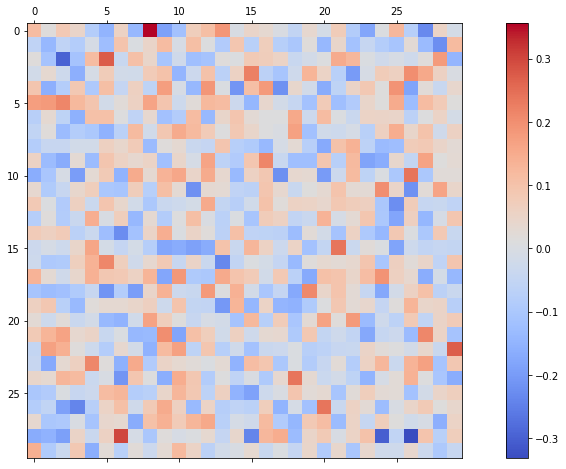

In [10]:
fig, axes = plt.subplots()
min_val, max_val = -3, 3
pos = axes.matshow(Abar[0:30, 0:30], cmap=plt.cm.coolwarm)
fig.colorbar(pos)

In [11]:
df

,uid,iid,rui,est,details
0,de413cff-1505-4034-b693-c83270a3c4c5,08ed3a9e-75a9-4f91-b318-c24cf56eb6e7,0.0,0.515123,{'was_impossible': False}
1,04d81b31-4ed2-482a-811e-f3ba0acb878e,96451ccb-f309-4dd5-8602-bee620cae5a1,1.0,0.417866,{'was_impossible': False}
2,6c5ae334-c34f-4704-8d25-8f7e7710c987,a1a501b3-7594-47bd-8203-a8a685148af7,1.0,0.460564,{'was_impossible': False}
3,da91dd54-642d-4cb0-a2dd-7fd2dfb012e3,8d1cc944-5cd9-4f8e-b5b3-aa554d849d16,1.0,0.543769,{'was_impossible': False}
4,8cde1fbe-5760-497e-8171-ca7f8ccc0a0d,542dc7ef-cdd0-4833-a9b9-af8cb45a50e5,1.0,0.443963,{'was_impossible': False}
5,6c762897-20b9-450d-bcb1-823aff6b6d39,ba0aeefd-4d76-477c-a215-e8bbb987f3e9,0.0,0.535607,{'was_impossible': False}
6,1be7e6f8-9fa7-4f23-8f14-8eefa23baab1,eefa74aa-9dbd-4201-a5c5-e1c778e0179f,1.0,0.740459,{'was_impossible': False}
7,5aca202d-d8c6-4d72-b2b1-9fb43bfcad41,69459cfd-a1a2-4557-866d-1a5bbd0b185d,1.0,0.553464,{'was_impossible': False}
8,e8cf9f9b-a3b5-45a2-88c1-8cd842bc73d5,7bc7464a-9fec-42cd-9b18-bf45109494b7,0.0,0.545921,{'was_impossible': False}
9,ab39ca5a-622b-443f-b150-269fa8e0d581,21a6dd80-cb36-4028-8241-4f44e9ff8192,1.0,0.459532,{'was_impossible': False}
